## Business Understanding:

SyriaTel, a telecommunications company, faces a significant challenge with customer churn, leading to financial losses. To tackle this, they initiate a predictive analytics project aimed at identifying customers likely to churn soon. By analyzing historical customer data like demographics, usage patterns, and service interactions, they develop a binary classifier model. This model, trained on various machine learning algorithms, predicts churn likelihood in real-time, enabling SyriaTel to proactively target at-risk customers with personalized retention strategies. Ultimately, this predictive approach helps SyriaTel optimize marketing efforts, improve customer retention, and boost overall profitability.

## Data Understanding:

In preparing to use logistic regression for churn prediction at SyriaTel, the initial step involves collecting historical customer data encompassing demographics, usage patterns, subscription details, and service interactions. Subsequently, a thorough exploration of the dataset is conducted to understand its structure, identify relevant features, and preprocess the data to handle missing values and categorical variables. Following data splitting into training and testing sets, logistic regression is trained on the training data and evaluated using metrics like accuracy and F1 score. Through model optimization, hyperparameters are fine-tuned to enhance predictive performance, ensuring the model's robustness and interpretability. Ultimately, this approach enables SyriaTel to gain insights into customer churn drivers and implement targeted retention strategies effectively.

## Data Analysis:

Importing the necessary libraries below

In [141]:
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler  # For standardizing numerical features
from sklearn.linear_model import LogisticRegression  # For logistic regression model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve, auc, make_scorer,f1_score  # For model evaluation metrics
from sklearn.dummy import DummyClassifier # For creating dummy models and comparing it to our own
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning
import warnings
warnings.filterwarnings("ignore") # For filtering out annoying warnings lol
from imblearn.over_sampling import SMOTE # For fixin class imbalances
from sklearn.preprocessing import LabelEncoder # For the boolean values in the dataset

In [142]:
df = pd.read_csv('dataset\Customer Churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The dataset has no null values but has a mixture of string and float datatypes so we need to convert the object data types to float for the regression model later on.

In [143]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Looking at all the columns that have an object data type to see how it can be converted and if theres a need to do so

In [144]:
object_columns = ['state','voice mail plan','international plan','phone number']
df.loc[:,object_columns]

,state,voice mail plan,international plan,phone number
0,KS,yes,no,382-4657
1,OH,yes,no,371-7191
2,NJ,no,no,358-1921
3,OH,no,yes,375-9999
4,OK,no,yes,330-6626
...,...,...,...,...
3328,AZ,yes,no,414-4276
3329,WV,no,no,370-3271
3330,RI,no,no,328-8230
3331,CT,no,yes,364-6381


so the internation plan and the voice mail plan are boolean so will convert to bool the state isnt really required so we can drop that column and also phone number.But before dropping state will look at how different state have different numbers of churns and see if theres a pattern somewhere and the state with the greatest number of churned customers

In [145]:
for index,data in enumerate(df['voice mail plan']):
    if data == 'yes':
        df['voice mail plan'][index] = True
    else:
        df['voice mail plan'][index] = False
df['voice mail plan'].head()


0     True
1     True
2    False
3    False
4    False
Name: voice mail plan, dtype: object

In [146]:
df['voice mail plan'] = df['voice mail plan'].astype(bool)
df['voice mail plan'].value_counts()

voice mail plan
False    2411
True      922
Name: count, dtype: int64

Converted the international plan to boolean true and false values as show below

In [147]:
for index,data in enumerate(df['international plan']):
    if data == 'yes':
        df['international plan'][index] = True
    else:
        df['international plan'][index] = False
df['international plan'] = df['international plan'].astype(bool)
df['international plan'].value_counts()

international plan
False    3010
True      323
Name: count, dtype: int64

In [148]:
df['state'].value_counts()


state
WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: count, dtype: int64

Since its significant one hot encoding could be use to create classification categories for the values in state allowing for Logistics Regression to be done.Earlier high imbalance was observed between the values in international plan and voice mail plan columns and so we would have to perform some smote operations to deal with such

One hot encoding on the state column

In [149]:
encoded_column = pd.get_dummies(df['state'],prefix='encoded',drop_first=True)
df = pd.concat([df.drop(columns='state'),encoded_column],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   phone number            3333 non-null   object 
 3   international plan      3333 non-null   bool   
 4   voice mail plan         3333 non-null   bool   
 5   number vmail messages   3333 non-null   int64  
 6   total day minutes       3333 non-null   float64
 7   total day calls         3333 non-null   int64  
 8   total day charge        3333 non-null   float64
 9   total eve minutes       3333 non-null   float64
 10  total eve calls         3333 non-null   int64  
 11  total eve charge        3333 non-null   float64
 12  total night minutes     3333 non-null   float64
 13  total night calls       3333 non-null   int64  
 14  total night charge      3333 non-null   

we'll drop the phone number since its all unique

In [150]:
df.duplicated().sum()

0

In [151]:
df = df.drop(columns='phone number')

In [152]:
df['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

It has a bit more columns but atleast the state was encoded correctly so the next step would be to split our data to train and test datasets using random state of 42 and a test size of 0.25

In [153]:
# we will assign the predictive features to X and the target to y
X = df.drop(columns='churn')
y = df['churn']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]


Now that thats successful we have created a train test split lets create a model and fit out training data using default hyperparameters


In [154]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
f1_scoree = f1_score(y_true=y_test,y_pred=y_pred)
accuracy_score = accuracy_score(y_true=y_test,y_pred=y_pred)
classification_report = classification_report(y_true=y_test,y_pred=y_pred)
print(classification_report)

              precision    recall  f1-score   support

       False       0.86      0.99      0.92       709
        True       0.64      0.06      0.10       125

    accuracy                           0.85       834
   macro avg       0.75      0.53      0.51       834
weighted avg       0.82      0.85      0.80       834



A weighted average of 0.8 considering the class imbalance isnt that bad honestly

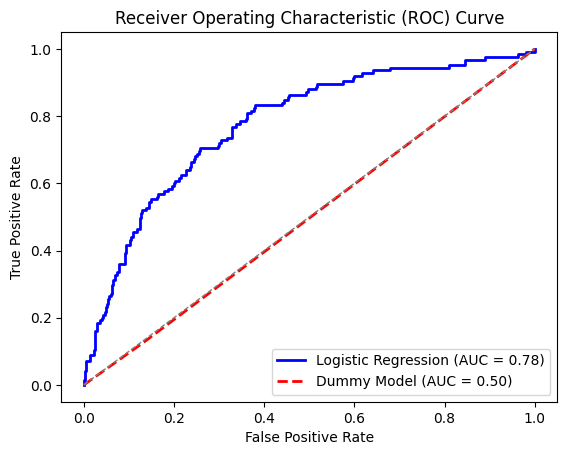

In [155]:
# Compute predicted probabilities for logistic regression model
y_pred_prob_lr = logreg.predict_proba(X_test)[:, 1]

# Create and train a dummy classifier
dummy_model = DummyClassifier(strategy='stratified')  # Replace 'stratified' with your desired strategy
dummy_model.fit(X_train, y_train)

# Compute predicted probabilities for dummy model
y_pred_prob_dummy = dummy_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for logistic regression model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC curve and ROC area for dummy model
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_prob_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plot ROC curve
plt.figure()
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_lr)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, linestyle='--', label='Dummy Model (AUC = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The Logisitc Regression model with an AUC of 0.78 does a bit better as copmared to a dummy model that only guesses False for a prediction.Now lets look at ways we could maybe improve the performance of our model to maybe increase the AUC of the model.


In [156]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}



# Define weighted average F1 score as the scoring metric
scorer = make_scorer(f1_score, average='weighted')

# Perform grid search
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring=scorer, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
weighted_avg_f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted Average F1 Score:", weighted_avg_f1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Weighted Average F1 Score: 0.7989846187144464


So the weighted average F1 score has reduced by a small percentage

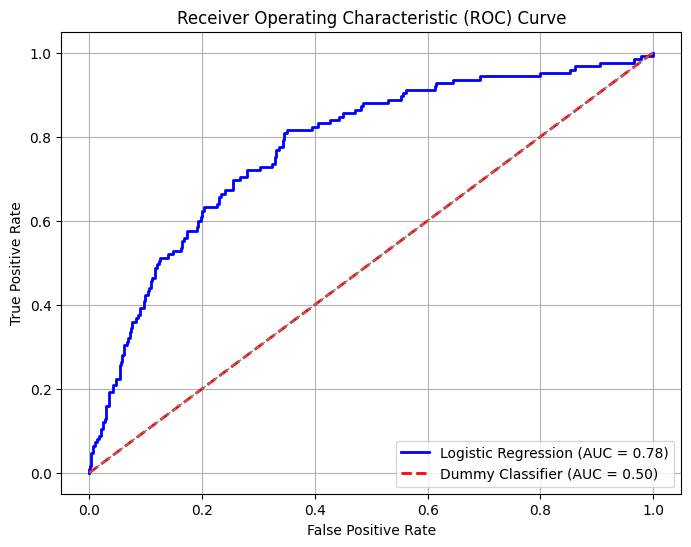

In [157]:

# Create logistic regression model and dummy classifier
logreg = LogisticRegression(**best_params)  # Using the best hyperparameters found by grid search
dummy = DummyClassifier(strategy='uniform')  # Create a dummy classifier with a random strategy

# Fit the models
logreg.fit(X_train,y_train)
dummy.fit(X_train, y_train)

# Compute predicted probabilities for logistic regression model and dummy classifier
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_dummy = dummy.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for logistic regression model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Compute ROC curve and ROC area for dummy classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_prob_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, linestyle='--', label='Dummy Classifier (AUC = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [158]:



# Assuming X_features is your feature dataset and y_target is your target dataset
# Replace X_features and y_target with your actual data

# Extract boolean columns from X_features
bool_columns = X.select_dtypes(include='bool').columns

# Convert boolean columns to integers using LabelEncoder
label_encoder = LabelEncoder()
for col in bool_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Instantiate SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)

# # Apply SMOTE to resample the data
# X_resampled, y_resampled = smote.fit_resample(X, y)

# Now, X_resampled and y_resampled contain the resampled feature and target data


Lets try and use smote for the class imbalance to see if maybe theres an improvement in the model

In [159]:


# Assuming X_features is your feature dataset and y_target is your target dataset
# Replace X_features and y_target with your actual data

# Separate the features with class imbalances and the target variable
X_imbalanced = X[['international plan', 'voice mail plan']]
y_imbalanced = y

# Instantiate SMOTE for the features
smote_features = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to resample the features
X_resampled_imbalanced, y_resampled_imbalanced = smote_features.fit_resample(X_imbalanced, y_imbalanced)

# Concatenate resampled features with the remaining features in X_features
X_resampled_features = pd.concat([X.drop(['international plan', 'voice mail plan'], axis=1), X_resampled_imbalanced], axis=1)

# Now, X_resampled_features contains the resampled feature data concatenated with the remaining features

# Instantiate SMOTE for the target variable
smote_target = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to resample the target variable
X_resampled_target, y_resampled_target = smote_target.fit_resample(X, y)

# Concatenate resampled target variable with the remaining features in X_features
X_resampled_target = pd.DataFrame(X_resampled_target, columns=X.columns)  # Ensure the columns are correctly named
y_resampled_target = pd.Series(y_resampled_target, name=y.name)  # Ensure the target variable retains its name

# Now, X_resampled_target contains the resampled feature data concatenated with the target variable


In [160]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled_target,y_resampled_target)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Penalty term
}



# Define weighted average F1 score as the scoring metric
scorer = make_scorer(f1_score, average='weighted')

# Perform grid search
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring=scorer, verbose=1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
weighted_avg_f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted Average F1 Score:", weighted_avg_f1)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Weighted Average F1 Score: 0.6946556122478752


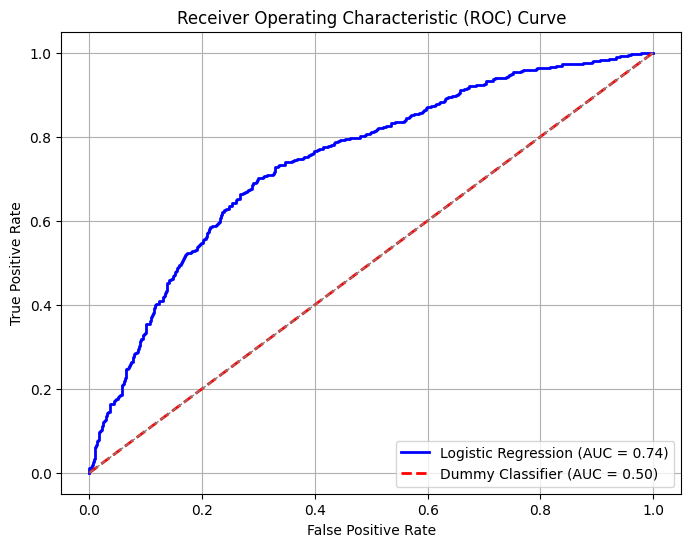

In [161]:
logreg = LogisticRegression(**best_params)  # Using the best hyperparameters found by grid search
dummy = DummyClassifier(strategy='uniform')  # Create a dummy classifier with a random strategy

# Fit the models
logreg.fit(X_train,y_train)
dummy.fit(X_train, y_train)

# Compute predicted probabilities for logistic regression model and dummy classifier
y_pred_prob_logreg = logreg.predict_proba(X_test)[:, 1]
y_pred_prob_dummy = dummy.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for logistic regression model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# Compute ROC curve and ROC area for dummy classifier
fpr_dummy, tpr_dummy, _ = roc_curve(y_test, y_pred_prob_dummy)
roc_auc_dummy = auc(fpr_dummy, tpr_dummy)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_dummy, tpr_dummy, color='red', lw=2, linestyle='--', label='Dummy Classifier (AUC = %0.2f)' % roc_auc_dummy)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')  # Diagonal line representing random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


The AUC of our model has decreased drastically that just goes to show that dealing with class imbalance with smote isnt the most appropriate course of action